In [821]:
import pandas as pd
import numpy as np

In [822]:
column_names_df = pd.read_csv('data/lending_club_data_dictionary.csv', delimiter=',', encoding='latin-1')
column_names_df = column_names_df.dropna(axis=1, how='all')
column_names_df = column_names_df.dropna(subset=['LoanStatNew'], how='all')
# column_names_df

## Q1: Download and read the data

In [823]:
loan_stat_df = pd.read_csv('data/LoanStats3a.csv',low_memory=False, delimiter=',', skiprows=1)#, encoding='latin-1')
print(f"original csv rows and columns: {loan_stat_df.shape}")
loan_stat_df = loan_stat_df.dropna(axis=1, how='all')   # dropping columns that does not contain values in any row
loan_stat_df = loan_stat_df.drop('id', axis=1)     # no values present in this column, except last two with text data
print(f"drop all nan columns shape: {loan_stat_df.shape}")
loan_stat_df = loan_stat_df.dropna(how='all')      # dropping rows having all nan values
print(f"drop all nan rows shape: {loan_stat_df.shape}")
print(f"All columns: [{loan_stat_df.columns}]")

original csv rows and columns: (42538, 144)
drop all nan columns shape: (42538, 62)
drop all nan rows shape: (42535, 62)
All columns: [Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
  

In [824]:
# import random

# # Define the row limit and randomly select a subset of rows
# row_limit = 1000
# selected_rows = loan_stat_df.sample(n=row_limit, random_state=42)  # Select 1000 rows at random

# # Write the selected rows to a CSV file
# selected_rows.to_csv('data/test_file.csv', index=False)

In [825]:
loan_stat_df.shape

(42535, 62)

In [826]:
loan_stat_df.describe()


,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,settlement_amount,settlement_percentage,settlement_term
count,42535.000,42535.000,42535.000,42535.000,42531.000,42535.000,42506.000,42506.000,15609.000,3651.000,42506.000,42506.000,42535.000,42506.000,42535.000,42535.000,42535.000,42535.000,42535.000,42535.000,42535.000,42535.000,42535.000,42535.000,42390.000,42535.000,42506.000,42390.000,42506.000,41170.000,42430.000,161.000,161.000,161.000
mean,11089.723,10821.586,10140.329,322.623,69136.556,13.373,0.152,1.081,35.018,59.176,9.344,0.058,14297.861,22.124,0.000,0.000,12020.918,11313.365,9675.676,2239.981,1.517,103.743,14.519,2613.300,0.000,1.000,0.000,0.000,0.143,0.045,0.000,4253.081,49.922,1.261
std,7410.938,7146.915,7131.529,208.927,64096.350,6.726,0.512,1.527,22.418,47.145,4.496,0.246,22018.441,11.593,0.000,0.000,9094.877,9038.593,7105.750,2585.057,7.830,740.893,162.964,4385.048,0.000,0.000,0.010,0.000,29.360,0.209,0.005,3117.891,15.526,4.130
min,500.000,500.000,0.000,15.670,1896.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,193.290,10.690,0.000
25%,5200.000,5000.000,4950.000,165.520,40000.000,8.200,0.000,0.000,17.000,0.000,6.000,0.000,3635.000,13.000,0.000,0.000,5465.951,4793.225,4400.000,657.100,0.000,0.000,0.000,211.070,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1800.000,40.000,0.000
50%,9700.000,9600.000,8500.000,277.690,59000.000,13.470,0.000,1.000,33.000,85.000,9.000,0.000,8821.000,20.000,0.000,0.000,9682.263,8956.240,8000.000,1339.160,0.000,0.000,0.000,528.530,0.000,1.000,0.000,0.000,0.000,0.000,0.000,3498.700,49.980,0.000
75%,15000.000,15000.000,14000.000,428.180,82500.000,18.680,0.000,2.000,51.000,101.000,12.000,0.000,17251.000,29.000,0.000,0.000,16428.525,15544.950,13499.995,2803.090,0.000,0.000,0.000,3170.220,0.000,1.000,0.000,0.000,0.000,0.000,0.000,5684.800,60.640,0.000
max,35000.000,35000.000,35000.000,1305.190,6000000.000,29.990,13.000,33.000,120.000,129.000,47.000,5.000,1207359.000,90.000,0.000,0.000,58886.473,58563.680,35000.020,23886.470,209.000,29623.350,7002.190,36115.200,0.000,1.000,1.000,0.000,6053.000,2.000,1.000,14798.200,92.740,24.000


In [827]:
pd.set_option('display.max_rows', None)
null_counts = loan_stat_df.isnull().sum()#.to_frame()
null_counts_df = null_counts.to_frame()
# null_counts_df

#### Dropping columns with null values count greater than 10000

In [828]:
nan_threshold = 10000
cols_to_drop = [col for col in loan_stat_df.columns if null_counts[col] > nan_threshold]
print(f"number of columns with null values count greater than 10000: {len(cols_to_drop)}")
# drop the columns
loan_stat_df.drop(cols_to_drop, axis=1, inplace=True)

# print the resulting dataframe
print(null_counts.shape)
print(f"shape of dataframe after dropping null valued columns: {loan_stat_df.shape}")

number of columns with null values count greater than 10000: 10
(62,)
shape of dataframe after dropping null valued columns: (42535, 52)


In [829]:
pd.set_option('display.max_columns', None)
loan_stat_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag
0,5000.000,5000.000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.650,0.000,Jan-1985,1.000,3.000,0.000,13648.000,83.7%,9.000,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-2015,171.620,Apr-2022,0.000,1.000,Individual,0.000,0.000,0.000,0.000,0.000,N,N
1,2500.000,2500.000,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.000,0.000,Apr-1999,5.000,3.000,0.000,1687.000,9.4%,4.000,f,0.000,0.000,1014.530,1014.530,456.460,435.170,0.000,122.900,1.110,Apr-2013,119.660,Oct-2016,0.000,1.000,Individual,0.000,0.000,0.000,0.000,0.000,N,N
2,2400.000,2400.000,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.720,0.000,Nov-2001,2.000,2.000,0.000,2956.000,98.5%,10.000,f,0.000,0.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-2014,649.910,Jun-2017,0.000,1.000,Individual,0.000,0.000,0.000,0.000,0.000,N,N
3,10000.000,10000.000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.000,0.000,Feb-1996,1.000,10.000,0.000,5598.000,21%,37.000,f,0.000,0.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-2015,357.480,Apr-2016,0.000,1.000,Individual,0.000,0.000,0.000,0.000,0.000,N,N
4,3000.000,3000.000,3000.000,60 months,12.69%,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-2011,Fully Paid,n,other,Personal,972xx,OR,17.940,0.000,Jan-1996,0.000,15.000,0.000,27783.000,53.9%,38.000,f,0.000,0.000,4066.908,4066.910,3000.000,1066.910,0.000,0.000,0.000,Jan-2017,67.300,Apr-2018,0.000,1.000,Individual,0.000,0.000,0.000,0.000,0.000,N,N


#### unique value count in each column

In [830]:
loan_stat_df.nunique().to_frame() #number of unique values in all columns

,0
loan_amnt,898
funded_amnt,1051
funded_amnt_inv,9338
term,2
int_rate,394
installment,16459
grade,7
sub_grade,35
emp_title,30658
emp_length,11


In [831]:
print(loan_stat_df['grade'].value_counts())
print(loan_stat_df['term'].value_counts())

B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64
 36 months    31534
 60 months    11001
Name: term, dtype: int64


In [832]:
loan_stat_df.loc[loan_stat_df['loan_status'] == "Does not meet the credit policy. Status:Fully Paid", 'loan_status_altered'] = 'Fully Paid'
loan_stat_df.loc[loan_stat_df['loan_status'] == "Does not meet the credit policy. Status:Charged Off", 'loan_status_altered'] = 'Charged Off'
loan_stat_df.loc[loan_stat_df['loan_status'] == "Charged Off", 'loan_status_altered'] = 'Charged Off'
loan_stat_df.loc[loan_stat_df['loan_status'] == "Fully Paid", 'loan_status_altered'] = 'Fully Paid'
print(loan_stat_df['loan_status_altered'].value_counts())
print(loan_stat_df.shape)
loan_stat_df.head()

Fully Paid     36104
Charged Off     6431
Name: loan_status_altered, dtype: int64
(42535, 53)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag,loan_status_altered
0,5000.000,5000.000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.650,0.000,Jan-1985,1.000,3.000,0.000,13648.000,83.7%,9.000,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-2015,171.620,Apr-2022,0.000,1.000,Individual,0.000,0.000,0.000,0.000,0.000,N,N,Fully Paid
1,2500.000,2500.000,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.000,0.000,Apr-1999,5.000,3.000,0.000,1687.000,9.4%,4.000,f,0.000,0.000,1014.530,1014.530,456.460,435.170,0.000,122.900,1.110,Apr-2013,119.660,Oct-2016,0.000,1.000,Individual,0.000,0.000,0.000,0.000,0.000,N,N,Charged Off
2,2400.000,2400.000,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.720,0.000,Nov-2001,2.000,2.000,0.000,2956.000,98.5%,10.000,f,0.000,0.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-2014,649.910,Jun-2017,0.000,1.000,Individual,0.000,0.000,0.000,0.000,0.000,N,N,Fully Paid
3,10000.000,10000.000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.000,0.000,Feb-1996,1.000,10.000,0.000,5598.000,21%,37.000,f,0.000,0.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-2015,357.480,Apr-2016,0.000,1.000,Individual,0.000,0.000,0.000,0.000,0.000,N,N,Fully Paid
4,3000.000,3000.000,3000.000,60 months,12.69%,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-2011,Fully Paid,n,other,Personal,972xx,OR,17.940,0.000,Jan-1996,0.000,15.000,0.000,27783.000,53.9%,38.000,f,0.000,0.000,4066.908,4066.910,3000.000,1066.910,0.000,0.000,0.000,Jan-2017,67.300,Apr-2018,0.000,1.000,Individual,0.000,0.000,0.000,0.000,0.000,N,N,Fully Paid


In [833]:
loan_stat_df = loan_stat_df.drop(columns=['pymnt_plan', 'initial_list_status','initial_list_status','out_prncp','out_prncp_inv','collections_12_mths_ex_med','policy_code','application_type','chargeoff_within_12_mths','hardship_flag'])
print(f"shape of dataframe after dropping single valued columns: {loan_stat_df.shape}")
loan_stat_df.head()

shape of dataframe after dropping single valued columns: (42535, 44)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag,loan_status_altered
0,5000.000,5000.000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-2011,Fully Paid,credit_card,Computer,860xx,AZ,27.650,0.000,Jan-1985,1.000,3.000,0.000,13648.000,83.7%,9.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-2015,171.620,Apr-2022,0.000,0.000,0.000,0.000,N,Fully Paid
1,2500.000,2500.000,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-2011,Charged Off,car,bike,309xx,GA,1.000,0.000,Apr-1999,5.000,3.000,0.000,1687.000,9.4%,4.000,1014.530,1014.530,456.460,435.170,0.000,122.900,1.110,Apr-2013,119.660,Oct-2016,0.000,0.000,0.000,0.000,N,Charged Off
2,2400.000,2400.000,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-2011,Fully Paid,small_business,real estate business,606xx,IL,8.720,0.000,Nov-2001,2.000,2.000,0.000,2956.000,98.5%,10.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-2014,649.910,Jun-2017,0.000,0.000,0.000,0.000,N,Fully Paid
3,10000.000,10000.000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-2011,Fully Paid,other,personel,917xx,CA,20.000,0.000,Feb-1996,1.000,10.000,0.000,5598.000,21%,37.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-2015,357.480,Apr-2016,0.000,0.000,0.000,0.000,N,Fully Paid
4,3000.000,3000.000,3000.000,60 months,12.69%,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-2011,Fully Paid,other,Personal,972xx,OR,17.940,0.000,Jan-1996,0.000,15.000,0.000,27783.000,53.9%,38.000,4066.908,4066.910,3000.000,1066.910,0.000,0.000,0.000,Jan-2017,67.300,Apr-2018,0.000,0.000,0.000,0.000,N,Fully Paid


#### missing values count in above columns

In [834]:
pd.set_option('display.max_rows', None)
null_counts = loan_stat_df.isnull().sum()#.to_frame()
na_counts = loan_stat_df.isna().sum()#.to_frame()
uniq_count_df = loan_stat_df.nunique().to_frame()
null_counts_df = null_counts.to_frame()
na_counts_df = na_counts.to_frame()
df_concat = pd.concat([null_counts_df, na_counts_df, uniq_count_df], axis=1)
df_concat.columns = ['null_counts', 'na_counts', 'uniq_count']
df_concat_filtered = df_concat[df_concat['null_counts'] > 0]
df_concat_sorted =df_concat.sort_values('uniq_count', ascending=False)
display(df_concat_filtered)
print(df_concat.shape)

,null_counts,na_counts,uniq_count
emp_title,2626,2626,30658
emp_length,1112,1112,11
annual_inc,4,4,5597
title,13,13,21264
delinq_2yrs,29,29,12
earliest_cr_line,29,29,530
inq_last_6mths,29,29,28
open_acc,29,29,44
pub_rec,29,29,6
revol_util,90,90,1119


(44, 3)


### replacing missing values in annual income column by mean annual income when grouped by state

In [835]:
# group by state and compute the mean annual income
grouped = loan_stat_df.groupby('addr_state')['annual_inc'].transform(lambda x: x.fillna(x.mean()))

# update the dataframe with the new values
loan_stat_df['annual_inc'] = grouped

# display the updated dataframe
# display(loan_stat_df)

## Q2: average annual income and number of loan applicants by state

272573.77452335024


In [786]:
# group by state and compute the mean annual income and row counts
grouped_app = loan_stat_df.groupby('addr_state').agg({'annual_inc': 'mean', 'addr_state': 'count' })

# rename columns for clarity
grouped_app = grouped_app.rename(columns={'annual_inc': 'Avg Annual Income', 'addr_state': 'Number of Applicants'})

# display the grouped dataframe
display(grouped_app)
print(grouped_app.shape)

,Avg Annual Income,Number of Applicants
addr_state,,
AK,78902.431,86
AL,63275.836,484
AR,59946.405,261
AZ,67799.876,933
CA,72221.439,7429
CO,66823.790,857
CT,75707.016,816
DC,77794.438,224
DE,69437.426,136


(50, 2)


In [787]:
grouped_app['Number of Applicants'].sum()

42535

## Q3: annual income of applicants from West Virginia and New Mexico.

In [788]:
grouped_app_wv_nm = grouped_app.loc[['WV','NM']]
display(grouped_app_wv_nm)
grouped_app_wv_nm.loc['WV']['Avg Annual Income']

,Avg Annual Income,Number of Applicants
addr_state,,
WV,54235.403,187
NM,81936.604,205


54235.40294117647

## Q3a: Plot a histogram comparing the annual income of applicants from these states.

In [789]:
loan_stat_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag,loan_status_altered
0,5000.000,5000.000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-2011,Fully Paid,credit_card,Computer,860xx,AZ,27.650,0.000,Jan-1985,1.000,3.000,0.000,13648.000,83.7%,9.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-2015,171.620,Apr-2022,0.000,0.000,0.000,0.000,N,Fully Paid
1,2500.000,2500.000,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-2011,Charged Off,car,bike,309xx,GA,1.000,0.000,Apr-1999,5.000,3.000,0.000,1687.000,9.4%,4.000,1014.530,1014.530,456.460,435.170,0.000,122.900,1.110,Apr-2013,119.660,Oct-2016,0.000,0.000,0.000,0.000,N,Charged Off
2,2400.000,2400.000,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-2011,Fully Paid,small_business,real estate business,606xx,IL,8.720,0.000,Nov-2001,2.000,2.000,0.000,2956.000,98.5%,10.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-2014,649.910,Jun-2017,0.000,0.000,0.000,0.000,N,Fully Paid
3,10000.000,10000.000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-2011,Fully Paid,other,personel,917xx,CA,20.000,0.000,Feb-1996,1.000,10.000,0.000,5598.000,21%,37.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-2015,357.480,Apr-2016,0.000,0.000,0.000,0.000,N,Fully Paid
4,3000.000,3000.000,3000.000,60 months,12.69%,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-2011,Fully Paid,other,Personal,972xx,OR,17.940,0.000,Jan-1996,0.000,15.000,0.000,27783.000,53.9%,38.000,4066.908,4066.910,3000.000,1066.910,0.000,0.000,0.000,Jan-2017,67.300,Apr-2018,0.000,0.000,0.000,0.000,N,Fully Paid


In [790]:
df_wv_inc = loan_stat_df.loc[loan_stat_df['addr_state']=='WV']
WV_inc_list = list(df_wv_inc['annual_inc'])
WV_inc_list_int = [int(x) for x in WV_inc_list]
df_nm_inc = loan_stat_df.loc[loan_stat_df['addr_state']=='NM']
NM_inc_list = list(df_nm_inc['annual_inc'])
NM_inc_list_int = [int(x) for x in NM_inc_list]
NM_inc_list_int.sort(reverse=True)

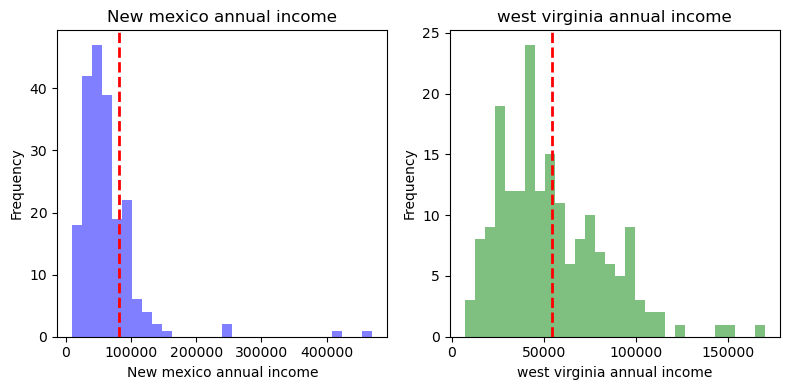

In [793]:
import matplotlib.pyplot as plt

# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot the first histogram
axs[0].hist(NM_inc_list_int[1:], bins=30, alpha=0.5, color='blue')
axs[0].axvline(grouped_app_wv_nm.loc['NM']['Avg Annual Income'], color='r', linestyle='dashed', linewidth=2)
axs[0].set_title('New mexico annual income')
axs[0].set_xlabel('New mexico annual income')
axs[0].set_ylabel('Frequency')

# Plot the second histogram
axs[1].hist(WV_inc_list_int, bins=30, alpha=0.5, color='green')
axs[1].axvline(grouped_app_wv_nm.loc['WV']['Avg Annual Income'], color='r', linestyle='dashed', linewidth=2)
axs[1].set_title('west virginia annual income')
axs[1].set_xlabel('west virginia annual income')
axs[1].set_ylabel('Frequency')

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()


## Q3b: Form and test a hypothesis regarding the average annual incomes of the residents of West Virginia and New Mexico

Hypothesis: The average annual income of residents in West Virginia is higher than the average annual income of residents in New Mexico

In [820]:
display(grouped_app_wv_nm)

,Avg Annual Income,Number of Applicants
addr_state,,
WV,54235.403,187
NM,81936.604,205


To determine if the difference between the two averages is significant, we will conduct a hypothesis test. This involves calculating a t-test to determine if the difference is statistically significant.

Define the null and alternative hypotheses:
- Null hypothesis: The average annual income of residents in West Virginia is equal to the average annual income of residents in New Mexico.
- Alternative hypothesis: The average annual income of residents in West Virginia is not equal to the average annual income of residents in New Mexico.

In [846]:
import researchpy as rp
summary, results = rp.ttest(group1= loan_stat_df.loc[loan_stat_df['addr_state']=='NM']['annual_inc'], group1_name= "New mexico",
                    group2= loan_stat_df.loc[loan_stat_df['addr_state']=='WV']['annual_inc'], group2_name= "West virginia")
print(summary)
print(results)

        Variable       N      Mean         SD        SE  95% Conf.   Interval
0     New mexico 205.000 81936.604 272573.775 19037.378  44401.350 119471.859
1  West virginia 187.000 54235.403  28509.979  2084.856  50122.398  58348.407
2       combined 392.000 68722.001 198348.070 10018.090  49025.937  88418.064
                           Independent t-test   results
0  Difference (New mexico - West virginia) =  27701.201
1                       Degrees of freedom =    390.000
2                                        t =      1.383
3                    Two side test p value =      0.168
4                   Difference < 0 p value =      0.916
5                   Difference > 0 p value =      0.084
6                                Cohen's d =      0.140
7                                Hedge's g =      0.140
8                           Glass's delta1 =      0.102
9                         Point-Biserial r =      0.070


/Users/shashikumarp/opt/anaconda3/envs/att-env/lib/python3.8/site-packages/researchpy/ttest.py:38: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



If the significance level is set at 0.05, then neither of the p-values is less than the significance level. In other words, neither of them is statistically significant at the 0.05 level.

From above table we can see, p-value is greater than significance 0.05, hence difference in average is not considered statistically significant and the hypothesis is not supported.

Hence we fail to reject the null hypothesis. This means that we do not have enough evidence to support the alternative hypothesis and we cannot conclude that there is a statistically significant difference between the two groups being compared.

It's important to note that failing to reject the null hypothesis does not mean that the null hypothesis is true, only that we don't have sufficient evidence to reject it.

## Q4a: Build a derived variable representing whether an applicant defaulted on their loan.

In [794]:
loan_stat_df.head()
# we have created the column 'loan_status_altered' derived from 'loan_status' column

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag,loan_status_altered
0,5000.000,5000.000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-2011,Fully Paid,credit_card,Computer,860xx,AZ,27.650,0.000,Jan-1985,1.000,3.000,0.000,13648.000,83.7%,9.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-2015,171.620,Apr-2022,0.000,0.000,0.000,0.000,N,Fully Paid
1,2500.000,2500.000,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-2011,Charged Off,car,bike,309xx,GA,1.000,0.000,Apr-1999,5.000,3.000,0.000,1687.000,9.4%,4.000,1014.530,1014.530,456.460,435.170,0.000,122.900,1.110,Apr-2013,119.660,Oct-2016,0.000,0.000,0.000,0.000,N,Charged Off
2,2400.000,2400.000,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-2011,Fully Paid,small_business,real estate business,606xx,IL,8.720,0.000,Nov-2001,2.000,2.000,0.000,2956.000,98.5%,10.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-2014,649.910,Jun-2017,0.000,0.000,0.000,0.000,N,Fully Paid
3,10000.000,10000.000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-2011,Fully Paid,other,personel,917xx,CA,20.000,0.000,Feb-1996,1.000,10.000,0.000,5598.000,21%,37.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-2015,357.480,Apr-2016,0.000,0.000,0.000,0.000,N,Fully Paid
4,3000.000,3000.000,3000.000,60 months,12.69%,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-2011,Fully Paid,other,Personal,972xx,OR,17.940,0.000,Jan-1996,0.000,15.000,0.000,27783.000,53.9%,38.000,4066.908,4066.910,3000.000,1066.910,0.000,0.000,0.000,Jan-2017,67.300,Apr-2018,0.000,0.000,0.000,0.000,N,Fully Paid


## Q4b: Build a binary classification model to predict which loans will default

-       before we proceed to train a model for predicting the loan defaulter, we need to analyse which of the feature have impact on load status and which features doesn't.
-       we have cleaned the data by dropping the columns which:
        -       contains null values in entire columns
        -       conatins single value in entire columns
        -       contains null values counts greater than 10000
-       after the above step we have obtained dataframe containing 44 columns and 42535 rows
-       further we need to handle missing values and outliers in each columns
                for this we are assuming text data or description will not have any impact on loan_status
                plotting box plots for each feature vs loan status
                from box plot if we see any dependency of a feature, then we reatiain that column for imputing missing values and outliers
                further proceeding with machine learning model for prediction

In [795]:
loan_stat_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag,loan_status_altered
0,5000.000,5000.000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-2011,Fully Paid,credit_card,Computer,860xx,AZ,27.650,0.000,Jan-1985,1.000,3.000,0.000,13648.000,83.7%,9.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-2015,171.620,Apr-2022,0.000,0.000,0.000,0.000,N,Fully Paid
1,2500.000,2500.000,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-2011,Charged Off,car,bike,309xx,GA,1.000,0.000,Apr-1999,5.000,3.000,0.000,1687.000,9.4%,4.000,1014.530,1014.530,456.460,435.170,0.000,122.900,1.110,Apr-2013,119.660,Oct-2016,0.000,0.000,0.000,0.000,N,Charged Off
2,2400.000,2400.000,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-2011,Fully Paid,small_business,real estate business,606xx,IL,8.720,0.000,Nov-2001,2.000,2.000,0.000,2956.000,98.5%,10.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-2014,649.910,Jun-2017,0.000,0.000,0.000,0.000,N,Fully Paid
3,10000.000,10000.000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-2011,Fully Paid,other,personel,917xx,CA,20.000,0.000,Feb-1996,1.000,10.000,0.000,5598.000,21%,37.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-2015,357.480,Apr-2016,0.000,0.000,0.000,0.000,N,Fully Paid
4,3000.000,3000.000,3000.000,60 months,12.69%,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-2011,Fully Paid,other,Personal,972xx,OR,17.940,0.000,Jan-1996,0.000,15.000,0.000,27783.000,53.9%,38.000,4066.908,4066.910,3000.000,1066.910,0.000,0.000,0.000,Jan-2017,67.300,Apr-2018,0.000,0.000,0.000,0.000,N,Fully Paid


#### column with free text: title, emp_title. hence dropping these two columns

In [796]:
loan_stat_df = loan_stat_df.drop(['title', 'emp_title'], axis=1)

In [797]:
def extract_term(s):
    return int(s.split()[0])

# Apply the function to the 'term' column using the .apply() method
loan_stat_df['term'] = loan_stat_df['term'].apply(extract_term)

In [798]:
cols_with_missing_vals = df_concat_filtered.drop(index=['title', 'emp_title', 'annual_inc'])
cols_with_missing_vals

,null_counts,na_counts,uniq_count
emp_length,1112,1112,11
delinq_2yrs,29,29,12
earliest_cr_line,29,29,530
inq_last_6mths,29,29,28
open_acc,29,29,44
pub_rec,29,29,6
revol_util,90,90,1119
total_acc,29,29,83
last_pymnt_d,83,83,112
last_credit_pull_d,4,4,187


In [799]:
# only columns with missing values
loan_stat_df[list(cols_with_missing_vals.index)].head()

,emp_length,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,last_pymnt_d,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,10+ years,0.000,Jan-1985,1.000,3.000,0.000,83.7%,9.000,Jan-2015,Apr-2022,0.000,0.000,0.000,0.000
1,< 1 year,0.000,Apr-1999,5.000,3.000,0.000,9.4%,4.000,Apr-2013,Oct-2016,0.000,0.000,0.000,0.000
2,10+ years,0.000,Nov-2001,2.000,2.000,0.000,98.5%,10.000,Jun-2014,Jun-2017,0.000,0.000,0.000,0.000
3,10+ years,0.000,Feb-1996,1.000,10.000,0.000,21%,37.000,Jan-2015,Apr-2016,0.000,0.000,0.000,0.000
4,1 year,0.000,Jan-1996,0.000,15.000,0.000,53.9%,38.000,Jan-2017,Apr-2018,0.000,0.000,0.000,0.000


In [800]:
# rows containing atleast once missing value # stratified approach
null_data = loan_stat_df[loan_stat_df.isnull().any(axis=1)]
loan_stat_df_null_dropped = loan_stat_df.dropna(how='any')
null_data.head()
print(null_data.shape)
print(null_data['loan_status_altered'].value_counts())
null_data_FP = null_data.loc[null_data['loan_status_altered']=='Fully Paid']
null_data_CO = null_data.loc[null_data['loan_status_altered']=='Charged Off']
null_dropped_FP = loan_stat_df_null_dropped.loc[loan_stat_df_null_dropped['loan_status_altered']=='Fully Paid']
null_dropped_CO = loan_stat_df_null_dropped.loc[loan_stat_df_null_dropped['loan_status_altered']=='Charged Off']
print(f"rows containing ATLEAST ONE missing value with loan status as Fully paid {null_data_FP.shape} and Charged off {null_data_CO.shape}")
print(f"rows containing ZERO missing value with loan status as Fully paid {null_dropped_FP.shape} and Charged off {null_dropped_CO.shape}")

(2605, 42)
Fully Paid     1937
Charged Off     668
Name: loan_status_altered, dtype: int64
rows containing ATLEAST ONE missing value with loan status as Fully paid (1937, 42) and Charged off (668, 42)
rows containing ZERO missing value with loan status as Fully paid (34167, 42) and Charged off (5763, 42)


##### use the above dataframes for imputing the missing values with mean, median, mode, extrapolate etc

#### column emp_length missing values replacement with mode

In [801]:
# ['emp_length','delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_util','total_acc','last_pymnt_d','last_credit_pull_d','acc_now_delinq','delinq_amnt','pub_rec_bankruptcies','tax_liens']
pd.options.mode.chained_assignment = None
mode_emp_length_FP = null_dropped_FP['emp_length'].mode()[0]
null_data_FP['emp_length'] = null_data_FP['emp_length'].fillna(mode_emp_length_FP)
print(null_data_FP['emp_length'].isnull().sum())
mode_emp_length_CO = null_dropped_CO['emp_length'].mode()[0]
null_data_CO['emp_length'] = null_data_CO['emp_length'].fillna(mode_emp_length_CO)
print(null_data_CO['emp_length'].isnull().sum())

0
0


#### column delinq_2yrs missing values replacement with mode

In [802]:
pd.options.mode.chained_assignment = None
mode_delinq_2yrs_FP = null_dropped_FP['delinq_2yrs'].mode()[0]
null_data_FP['delinq_2yrs'] = null_data_FP['delinq_2yrs'].fillna(mode_delinq_2yrs_FP)
print(null_data_FP['delinq_2yrs'].isnull().sum())
mode_delinq_2yrs_CO = null_dropped_CO['delinq_2yrs'].mode()[0]
null_data_CO['delinq_2yrs'] = null_data_CO['delinq_2yrs'].fillna(mode_delinq_2yrs_CO)
print(null_data_CO['delinq_2yrs'].isnull().sum())

0
0


#### column earliest_cr_line missing values replacement with mode

In [803]:
pd.options.mode.chained_assignment = None
mode_earliest_cr_line_FP = null_dropped_FP['earliest_cr_line'].mode()[0]
null_data_FP['earliest_cr_line'] = null_data_FP['earliest_cr_line'].fillna(mode_earliest_cr_line_FP)
print(null_data_FP['earliest_cr_line'].isnull().sum())
mode_earliest_cr_line_CO = null_dropped_CO['earliest_cr_line'].mode()[0]
null_data_CO['earliest_cr_line'] = null_data_CO['earliest_cr_line'].fillna(mode_earliest_cr_line_CO)
print(null_data_CO['earliest_cr_line'].isnull().sum())

0
0


#### column inq_last_6mths missing values replacement with median

In [804]:
pd.options.mode.chained_assignment = None
med_inq_last_6mths_FP = null_dropped_FP['inq_last_6mths'].median()
null_data_FP['inq_last_6mths'] = null_data_FP['inq_last_6mths'].fillna(med_inq_last_6mths_FP)
print(null_data_FP['inq_last_6mths'].isnull().sum())
med_inq_last_6mths_CO = null_dropped_CO['inq_last_6mths'].median()
null_data_CO['inq_last_6mths'] = null_data_CO['inq_last_6mths'].fillna(med_inq_last_6mths_CO)
print(null_data_CO['inq_last_6mths'].isnull().sum())

0
0


#### column open_acc missing values replacement with median

In [805]:
pd.options.mode.chained_assignment = None
med_open_acc_FP = null_dropped_FP['open_acc'].median()
null_data_FP['open_acc'] = null_data_FP['open_acc'].fillna(med_open_acc_FP)
print(null_data_FP['open_acc'].isnull().sum())
med_open_acc_CO = null_dropped_CO['open_acc'].median()
null_data_CO['open_acc'] = null_data_CO['open_acc'].fillna(med_open_acc_CO)
print(null_data_CO['open_acc'].isnull().sum())

0
0


#### column pub_rec missing values replacement with mode

In [806]:
pd.options.mode.chained_assignment = None
mode_pub_rec_FP = null_dropped_FP['pub_rec'].mode()[0]
null_data_FP['pub_rec'] = null_data_FP['pub_rec'].fillna(mode_pub_rec_FP)
print(null_data_FP['pub_rec'].isnull().sum())
mode_pub_rec_CO = null_dropped_CO['pub_rec'].mode()[0]
null_data_CO['pub_rec'] = null_data_CO['pub_rec'].fillna(mode_pub_rec_CO)
print(null_data_CO['pub_rec'].isnull().sum())

0
0


#### column revol_util missing values rows drop

In [807]:
# drop rows where column 'A' has null values
null_data_FP = null_data_FP.dropna(subset=['revol_util'])
null_data_CO = null_data_CO.dropna(subset=['revol_util'])

# print the resulting DataFrame
# print(null_data.shape)

#### column total_acc missing values with median

In [808]:
pd.options.mode.chained_assignment = None
med_total_acc_FP = null_dropped_FP['total_acc'].median()
null_data_FP['total_acc'] = null_data_FP['total_acc'].fillna(med_total_acc_FP)
print(null_data_FP['total_acc'].isnull().sum())
med_total_acc_CO = null_dropped_CO['total_acc'].median()
null_data_CO['total_acc'] = null_data_CO['total_acc'].fillna(med_total_acc_CO)
print(null_data_CO['total_acc'].isnull().sum())

0
0


#### column last_pymnt_d missing values with median

In [809]:
pd.options.mode.chained_assignment = None
convert_date = lambda x: x if pd.isnull(x) or (isinstance(x, str) and x.startswith('20')) else pd.to_datetime(x, format='%b-%Y').strftime('%Y%m')
# apply the lambda function to the 'date' column
null_dropped_FP['last_pymnt_d'] = null_dropped_FP['last_pymnt_d'].apply(convert_date)
null_dropped_CO['last_pymnt_d'] = null_dropped_CO['last_pymnt_d'].apply(convert_date)
null_data_FP['last_pymnt_d'] = null_data_FP['last_pymnt_d'].apply(convert_date)
null_data_CO['last_pymnt_d'] = null_data_CO['last_pymnt_d'].apply(convert_date)

med_last_pymnt_d_FP = null_dropped_FP['last_pymnt_d'].median()
null_data_FP['last_pymnt_d'] = null_data_FP['last_pymnt_d'].fillna(med_last_pymnt_d_FP)
print(null_data_FP['last_pymnt_d'].isnull().sum())
med_last_pymnt_d_CO = null_dropped_CO['last_pymnt_d'].median()
null_data_CO['last_pymnt_d'] = null_data_CO['last_pymnt_d'].fillna(med_last_pymnt_d_CO)
print(null_data_CO['last_pymnt_d'].isnull().sum())

0
0


#### column last_credit_pull_d missing values with median

In [810]:
pd.options.mode.chained_assignment = None
convert_date = lambda x: x if pd.isnull(x) or (isinstance(x, str) and x.startswith('20')) else pd.to_datetime(x, format='%b-%Y').strftime('%Y%m')
# apply the lambda function to the 'date' column
null_dropped_FP['last_credit_pull_d'] = null_dropped_FP['last_credit_pull_d'].apply(convert_date)
null_dropped_CO['last_credit_pull_d'] = null_dropped_CO['last_credit_pull_d'].apply(convert_date)
null_data_FP['last_credit_pull_d'] = null_data_FP['last_credit_pull_d'].apply(convert_date)
null_data_CO['last_credit_pull_d'] = null_data_CO['last_credit_pull_d'].apply(convert_date)

med_last_credit_pull_d_FP = null_dropped_FP['last_credit_pull_d'].median()
null_data_FP['last_credit_pull_d'] = null_data_FP['last_credit_pull_d'].fillna(med_last_credit_pull_d_FP)
print(null_data_FP['last_credit_pull_d'].isnull().sum())
med_last_credit_pull_d_CO = null_dropped_CO['last_credit_pull_d'].median()
null_data_CO['last_credit_pull_d'] = null_data_CO['last_credit_pull_d'].fillna(med_last_credit_pull_d_CO)
print(null_data_CO['last_credit_pull_d'].isnull().sum())

0
0


#### column acc_now_delinq missing values with mode

In [811]:
pd.options.mode.chained_assignment = None
mode_acc_now_delinq_FP = null_dropped_FP['acc_now_delinq'].mode()[0]
null_data_FP['acc_now_delinq'] = null_data_FP['acc_now_delinq'].fillna(mode_acc_now_delinq_FP)
print(null_data_FP['acc_now_delinq'].isnull().sum())
mode_acc_now_delinq_CO = null_dropped_CO['acc_now_delinq'].mode()[0]
null_data_CO['acc_now_delinq'] = null_data_CO['acc_now_delinq'].fillna(mode_acc_now_delinq_CO)
print(null_data_CO['acc_now_delinq'].isnull().sum())

0
0


#### column delinq_amnt missing values with mode

In [812]:
pd.options.mode.chained_assignment = None
mode_delinq_amnt_FP = null_dropped_FP['delinq_amnt'].mode()[0]
null_data_FP['delinq_amnt'] = null_data_FP['delinq_amnt'].fillna(mode_delinq_amnt_FP)
print(null_data_FP['delinq_amnt'].isnull().sum())
mode_delinq_amnt_CO = null_dropped_CO['delinq_amnt'].mode()[0]
null_data_CO['delinq_amnt'] = null_data_CO['delinq_amnt'].fillna(mode_delinq_amnt_CO)
print(null_data_CO['delinq_amnt'].isnull().sum())

0
0


#### column pub_rec_bankruptcies missing values with mode

In [813]:
pd.options.mode.chained_assignment = None
mode_pub_rec_bankruptcies_FP = null_dropped_FP['pub_rec_bankruptcies'].mode()[0]
null_data_FP['pub_rec_bankruptcies'] = null_data_FP['pub_rec_bankruptcies'].fillna(mode_pub_rec_bankruptcies_FP)
print(null_data_FP['pub_rec_bankruptcies'].isnull().sum())
mode_pub_rec_bankruptcies_CO = null_dropped_CO['pub_rec_bankruptcies'].mode()[0]
null_data_CO['pub_rec_bankruptcies'] = null_data_CO['pub_rec_bankruptcies'].fillna(mode_pub_rec_bankruptcies_CO)
print(null_data_CO['pub_rec_bankruptcies'].isnull().sum())

0
0


#### column tax_liens missing values with mode

In [814]:
pd.options.mode.chained_assignment = None
mode_tax_liens_FP = null_dropped_FP['tax_liens'].mode()[0]
null_data_FP['tax_liens'] = null_data_FP['tax_liens'].fillna(mode_tax_liens_FP)
print(null_data_FP['tax_liens'].isnull().sum())
mode_tax_liens_CO = null_dropped_CO['tax_liens'].mode()[0]
null_data_CO['tax_liens'] = null_data_CO['tax_liens'].fillna(mode_tax_liens_CO)
print(null_data_CO['tax_liens'].isnull().sum())

0
0


In [815]:
loan_stat_df_nonull_cleaned = pd.concat([null_data_CO, null_data_FP, null_dropped_CO, null_dropped_FP], axis=0, ignore_index=True)
print(loan_stat_df_nonull_cleaned.shape)

(42445, 42)


In [816]:
loan_stat_df_nonull_cleaned.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag,loan_status_altered
0,15000.000,15000.000,8725.000,36,14.27%,514.640,C,C2,9 years,RENT,60000.000,Not Verified,Dec-2011,Charged Off,debt_consolidation,103xx,NY,15.220,0.000,Oct-2003,1.000,7.000,0.000,5872.000,57.6%,11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,201207.000,0.000,201902,0.000,0.000,0.000,0.000,N,Charged Off
1,2500.000,2500.000,2500.000,36,7.51%,77.780,A,A3,10+ years,OWN,12000.000,Source Verified,Dec-2011,Charged Off,debt_consolidation,961xx,CA,16.300,0.000,Aug-1994,2.000,13.000,0.000,4853.000,42.2%,20.000,1838.880,1838.880,1575.060,253.740,0.000,10.080,0.000,201312,77.780,202103,0.000,0.000,0.000,0.000,N,Charged Off
2,1000.000,1000.000,1000.000,36,14.65%,34.500,C,C3,10+ years,RENT,18408.000,Not Verified,Dec-2011,Charged Off,major_purchase,080xx,NJ,6.000,0.000,Apr-1993,2.000,3.000,1.000,2510.000,83.7%,8.000,91.390,91.390,22.240,12.180,0.000,56.970,10.240,201201,34.500,201206,0.000,0.000,1.000,0.000,N,Charged Off
3,1700.000,1700.000,1700.000,36,7.90%,53.200,A,A4,10+ years,MORTGAGE,37800.000,Not Verified,Dec-2011,Charged Off,home_improvement,805xx,CO,27.000,0.000,Jul-1979,0.000,9.000,0.000,16333.000,91.2%,27.000,1221.230,1221.230,940.440,174.030,0.000,106.760,1.040,201309,53.200,201610,0.000,0.000,0.000,0.000,N,Charged Off
4,8575.000,8575.000,8575.000,36,17.58%,308.210,D,D4,10+ years,MORTGAGE,32000.000,Verified,Dec-2011,Charged Off,debt_consolidation,325xx,FL,22.540,0.000,Sep-2004,1.000,4.000,0.000,20142.000,89.9%,5.000,4646.170,4646.170,2808.630,1497.350,0.000,340.190,3.350,201302,308.210,201610,0.000,0.000,0.000,0.000,N,Charged Off


In [817]:
float_cols = loan_stat_df_nonull_cleaned.select_dtypes(include=['float'])
loan_stat_df_nonull_cleaned[float_cols.columns] = float_cols.astype(int)
loan_stat_df_nonull_cleaned.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag,loan_status_altered
0,15000,15000,8725,36,14.27%,514,C,C2,9 years,RENT,60000,Not Verified,Dec-2011,Charged Off,debt_consolidation,103xx,NY,15,0,Oct-2003,1,7,0,5872,57.6%,11,0,0,0,0,0,0,0,201207.000,0,201902,0,0,0,0,N,Charged Off
1,2500,2500,2500,36,7.51%,77,A,A3,10+ years,OWN,12000,Source Verified,Dec-2011,Charged Off,debt_consolidation,961xx,CA,16,0,Aug-1994,2,13,0,4853,42.2%,20,1838,1838,1575,253,0,10,0,201312,77,202103,0,0,0,0,N,Charged Off
2,1000,1000,1000,36,14.65%,34,C,C3,10+ years,RENT,18408,Not Verified,Dec-2011,Charged Off,major_purchase,080xx,NJ,6,0,Apr-1993,2,3,1,2510,83.7%,8,91,91,22,12,0,56,10,201201,34,201206,0,0,1,0,N,Charged Off
3,1700,1700,1700,36,7.90%,53,A,A4,10+ years,MORTGAGE,37800,Not Verified,Dec-2011,Charged Off,home_improvement,805xx,CO,27,0,Jul-1979,0,9,0,16333,91.2%,27,1221,1221,940,174,0,106,1,201309,53,201610,0,0,0,0,N,Charged Off
4,8575,8575,8575,36,17.58%,308,D,D4,10+ years,MORTGAGE,32000,Verified,Dec-2011,Charged Off,debt_consolidation,325xx,FL,22,0,Sep-2004,1,4,0,20142,89.9%,5,4646,4646,2808,1497,0,340,3,201302,308,201610,0,0,0,0,N,Charged Off


In [818]:
loan_stat_df_nonull_cleaned.to_csv('data/loan_stat_df_nonull_cleaned.csv', index=False)